In [1]:
heads = 12
dim = 768
n_tokens = 257
head_dim = dim // heads  # Dimension of each head. 64

In [2]:
import torch
import einops

In [3]:
x = torch.randn(10, n_tokens, 3 * dim)  
# (n_samples, n_tokens, dim)   = (10, 257, 3*768) = (10, 257, 3072)

In [4]:
qkv= x.reshape(10, n_tokens, 3, heads, head_dim)
# (n_samples, n_tokens, 3, heads, head_dim) = (10, 257, 3, 12, 64)
print(qkv.shape)
qkv = qkv.permute(
    2, 0, 3, 1, 4)  # (3, n_samples, heads, n_tokens, head_dim)
print(qkv.shape)
q, k, v = qkv[0], qkv[1], qkv[2]

k_t = k.transpose(-2, -1)
print(k.shape, k_t.shape,)
dp = torch.matmul(q, k_t) / head_dim**0.5
print(dp.shape)
attn = torch.softmax(dp, dim = -1)
print(attn.shape, v.shape)

# weighted_avg = attn @ v
weighted_avg =  torch.einsum('bhqk,bhke->bqhe', [attn, v])
print(weighted_avg.shape)
weighted_avg = einops.rearrange(weighted_avg, 'b q h e -> b q (h e)')
print(weighted_avg.shape)

weighted_avg1 =  torch.einsum('bhqk,bhke->bqhe', [attn, v])
print(weighted_avg1.shape)
# wa = torch.einsum('b h q k, b h k e -> b q h e', [attn, v])
wa = einops.rearrange(weighted_avg1, 'b q h e -> b q (h e)')
print(weighted_avg.shape, wa.shape)
wa == weighted_avg

torch.Size([10, 257, 3, 12, 64])
torch.Size([3, 10, 12, 257, 64])
torch.Size([10, 12, 257, 64]) torch.Size([10, 12, 64, 257])
torch.Size([10, 12, 257, 257])
torch.Size([10, 12, 257, 257]) torch.Size([10, 12, 257, 64])
torch.Size([10, 257, 12, 64])
torch.Size([10, 257, 768])
torch.Size([10, 257, 12, 64])
torch.Size([10, 257, 768]) torch.Size([10, 257, 768])


tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

In [5]:
z = einops.rearrange(x, 
                       'n_samples n_tokens (qkv_cnt heads head_dim) -> qkv_cnt n_samples heads n_tokens head_dim', 
                       qkv_cnt=3,
                       heads=heads,
                       head_dim=head_dim
)
Q, K, V = z
Q.shape

torch.Size([10, 12, 257, 64])

In [6]:
Q, K, V = z
DP = torch.einsum('bhqe,bhke->bhqk', [Q, K]) / head_dim**0.5
ATTN = torch.softmax(DP, dim = -1)


In [10]:
x = torch.randn(1, 1, 768)
einops.repeat(x, ' h w e -> n h w e', n=4).squeeze(1)

tensor([[[ 0.2748,  1.6191,  0.3342,  ...,  0.6423,  0.1509, -0.8868]],

        [[ 0.2748,  1.6191,  0.3342,  ...,  0.6423,  0.1509, -0.8868]],

        [[ 0.2748,  1.6191,  0.3342,  ...,  0.6423,  0.1509, -0.8868]],

        [[ 0.2748,  1.6191,  0.3342,  ...,  0.6423,  0.1509, -0.8868]]])

(array([125., 131.,  99.,  81.,  67.,  63.,  58.,  52.,  36.,  49.,  22.,
         29.,  30.,  16.,  20.,  18.,  16.,   6.,  15.,   7.,  10.,   9.,
          4.,   2.,   7.,   6.,   6.,   1.,   1.,   0.,   2.,   2.,   1.,
          2.,   2.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.18612032e-03, 1.39803693e-01, 2.78421283e-01, 4.17038858e-01,
        5.55656433e-01, 6.94274008e-01, 8.32891583e-01, 9.71509159e-01,
        1.11012673e+00, 1.24874425e+00, 1.38736188e+00, 1.52597940e+00,
        1.66459703e+00, 1.80321455e+00, 1.94183218e+00, 2.08044982e+00,
        2.21906734e+00, 2.3576

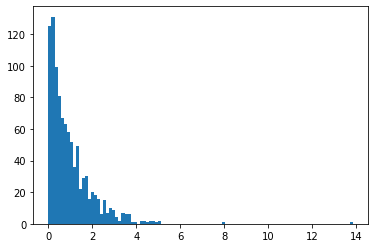

In [11]:
import torch
import matplotlib.pyplot as plt
eps = 1e-20
x = torch.rand(1000)
x1 = -torch.log(x+eps)

plt.hist(x1.detach().numpy(), bins=100)


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  5.,  4.,
         2., 15.,  7., 18., 20., 13., 24., 30., 21., 34., 28., 30., 35.,
        34., 40., 41., 27., 37., 28., 30., 27., 32., 24., 22., 23., 28.,
        27., 21., 16., 15., 24., 22., 19., 17., 20., 10.,  9., 10.,  9.,
         8., 11.,  8.,  7.,  5.,  3.,  4.,  2.,  4.,  5.,  4.,  0.,  1.,
         5.,  2.,  2.,  3.,  3.,  3.,  1.,  0.,  4.,  1.,  0.,  2.,  0.,
         0.,  1.,  2.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.6292193e+00, -2.5355563e+00, -2.4418936e+00, -2.3482306e+00,
        -2.2545679e+00, -2.1609049e+00, -2.0672421e+00, -1.9735792e+00,
        -1.8799163e+00, -1.7862535e+00, -1.6925906e+00, -1.5989277e+00,
        -1.5052649e+00, -1.4116020e+00, -1.3179392e+00, -1.2242763e+00,
        -1.1306133e+00, -1.0369505e+00, -9.4328761e-01, -8.4962475e-01,
        -7.5596189e-01, -6.6229904e-01, -5.6863618e-01, -4.7497329e-01,
  

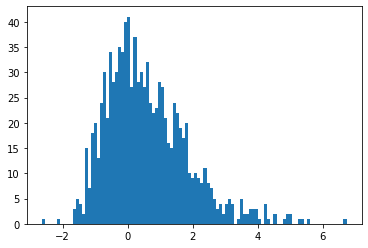

In [12]:
x2 = -torch.log(x1+eps)

plt.hist(x2.detach().numpy(), bins=100)